# Sessio 1: Introducció a la Computació Quàntica

### (Comencem afegint el paquet de càlculs numèrics Numpy)

In [6]:
import numpy as np

### Els estats qu[antics es defineixen en un espai de Hilbert. Aquest espai pot tenir un nombre finit o infinit de dimensions. Pel cas d'un Qubit aquest és un espai de 2 dimensions, que definim com un vector de 2 components.

In [7]:
state = np.array([1,0])
state

array([1, 0])

### Els estats quàntics són modificats per operadors. El resultat de l'acció d'un operador sobre un estat quàntic és un altre estat quàntic. Els operadors que modifiquen el Qubit s'escriuen com a matrius 2x2.

In [9]:
sx = np.array([[0,1],[1,0]])
sx

array([[0, 1],
       [1, 0]])

In [10]:
identity = np.eye(2)
identity

array([[1., 0.],
       [0., 1.]])

### Modifiquem l'estat aplicant l'operador sobre l'estat multiplicant la matriu de l'operador pel vector estat.

In [13]:
state = np.dot(sx, state)
state

array([0, 1])

In [14]:
### Recordem que els estats quàntics han d'estar normalitzats

In [19]:
def norm(state):
    return np.linalg.norm(state)

In [21]:
norm(state)

1.0

In [22]:
norm(np.array([2,0]))

2.0

### Les probabilitats d'obtenir una mesura s'obtenen a partir de la funció d'ona

def probabilities(state):
    return np.square(np.abs(state))/np.square(norm(state))

In [44]:
probabilities(state)

array([0., 1.])

In [47]:
probabilities(np.array([1,1]))

array([0.5, 0.5])

### Construïm estats de 2 qubits ... 

In [120]:
state = np.array([1, 0, 0, 0])
state

array([1, 0, 0, 0])

### ... i operadors de 2 qubits

In [121]:
sx_0_identity_1 = np.kron(sx, identity)
sx_0_identity_1

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [122]:
state = np.dot(sx_0_identity_1, state)
state

array([0., 0., 1., 0.])

### Mesurem els recursos que necessitem quan fem una simulació de més d'un qubit

In [105]:
from sys import getsizeof
def multiqubit(N):
    ini = sx
    for i in range(N):
        ini = np.kron(ini,sx)
    return getsizeof(ini)

In [106]:
import time

In [107]:
running_times = []
memory_size = []
for i in range(2,12):
    start = time.time()
    mem_i = multiqubit(i)
    end = time.time()
    running_times.append(end-start)
    memory_size.append(mem_i)

In [108]:
running_times

[0.0009531974792480469,
 0.0003733634948730469,
 0.0003135204315185547,
 0.00035881996154785156,
 0.0006110668182373047,
 0.002228260040283203,
 0.008368253707885742,
 0.04156494140625,
 0.1459200382232666,
 0.6001605987548828]

In [109]:
memory_size

[624, 2160, 8304, 32880, 131184, 524400, 2097264, 8388720, 33554544, 134217840]

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline 

### Representem els recursos (temps i memòria) emprats per crear un operador de N qubits

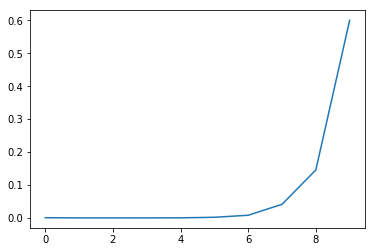

In [111]:
plt.plot(running_times)

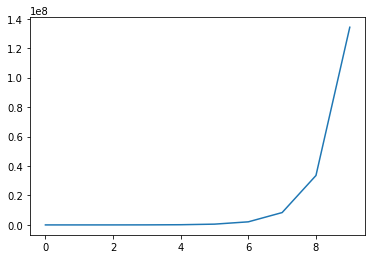

In [112]:
plt.plot(memory_size)